# **Question 1.** Regression and out-of-distribution prediction:

a. Download the wine quality datasets from https://archive.ics.uci.edu/ml/datasets/Wine+Quality

b. Explore, visualize, and pre-process the data as appropriate. [1]

In [60]:
import requests

# URL of the datasets
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Function to download the dataset
def download_dataset(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

# Download the red wine dataset
download_dataset(red_wine_url, 'winequality-red.csv')

# Download the white wine dataset
download_dataset(white_wine_url, 'winequality-white.csv')


## **Explore:**

In [61]:
import numpy as np
import pandas as pd
from IPython.display import display

# Load datasets
red_wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter=";")

# Display the first few rows of each dataset
print("Red Wine Data:")
display(red_wine_data.head())

print("\nWhite Wine Data:")
display(white_wine_data.head())


Red Wine Data:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5


White Wine Data:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [62]:
import pandas as pd
from IPython.display import display

# Load datasets
red_wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter=";")

# Display basic information about the datasets
print("Red Wine Data Information:")
display(red_wine_data.info())

print("\nWhite Wine Data Information:")
display(white_wine_data.info())


Red Wine Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None


White Wine Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


None

**Observation:**  It seems that both datasets have no missing values, which is good. Now, let's proceed with visualizing the distributions of features and the target variable (quality).First,  We'll use histograms to visualize the frequency of different quality ratings.

<ipython-input-63-4508a10b5b5e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=red_wine_data, palette='muted')
<ipython-input-63-4508a10b5b5e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=white_wine_data, palette='muted')# Plot histogram for white wine quality


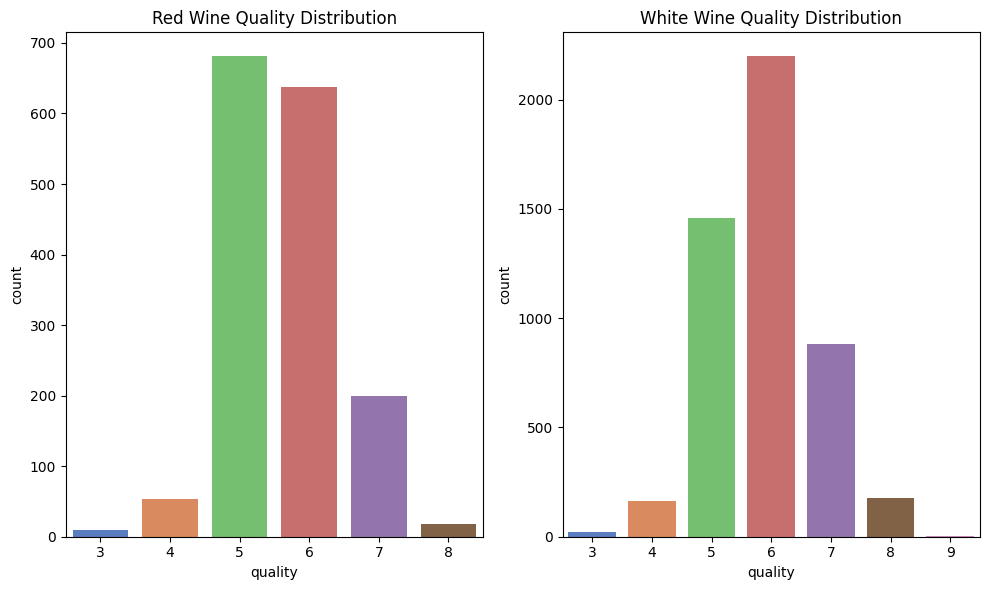

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot histogram for red wine quality
plt.subplot(1, 2, 1)
sns.countplot(x='quality', data=red_wine_data, palette='muted')
plt.title('Red Wine Quality Distribution')

# Plot histogram for white wine quality
plt.subplot(1, 2, 2)
sns.countplot(x='quality', data=white_wine_data, palette='muted')# Plot histogram for white wine quality
plt.title('White Wine Quality Distribution')

plt.tight_layout()
plt.show()


**Note:** We can use different types of plots to visualize the distributions of features and the target variable. One alternative to histograms is a kernel density estimation (KDE) plot, which provides a smoothed estimate of the distribution.
Let's visualize the distribution of the target variable "quality" using KDE plots for both red and white wine datasets.

<ipython-input-56-99115232b34b>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=red_wine_data['quality'], shade=True, color='r', legend=False)
<ipython-input-56-99115232b34b>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=white_wine_data['quality'], shade=True, color='b', legend=False)


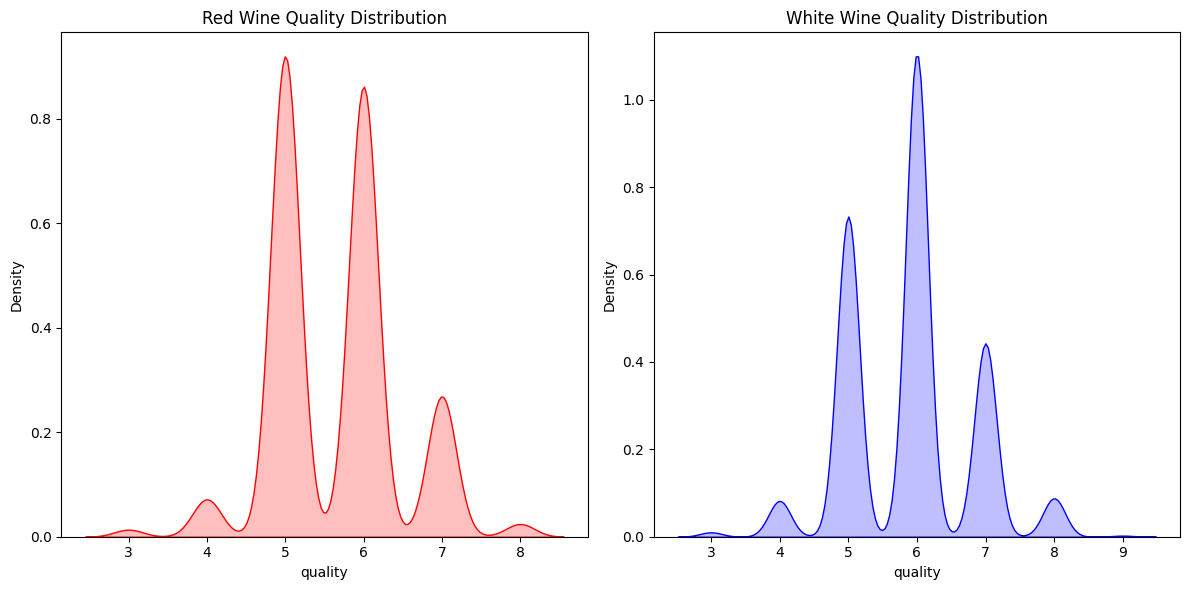

In [ ]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Plot KDE plot for red wine quality
plt.subplot(1, 2, 1)
sns.kdeplot(data=red_wine_data['quality'], shade=True, color='r', legend=False)
plt.title('Red Wine Quality Distribution')

# Plot KDE plot for white wine quality
plt.subplot(1, 2, 2)
sns.kdeplot(data=white_wine_data['quality'], shade=True, color='b', legend=False)
plt.title('White Wine Quality Distribution')

plt.tight_layout()
plt.show()


**Observation:** I got to know we can directly compare the histogramas and KDE of Red and White wine as follows.

<ipython-input-6-ff26f5edf2c6>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=red_wine_data['quality'], shade=True, color='r', label='Red Wine')# Plot KDE for quality of red wine
<ipython-input-6-ff26f5edf2c6>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=white_wine_data['quality'], shade=True, color='b', label='White Wine')# Plot KDE for quality of white wine


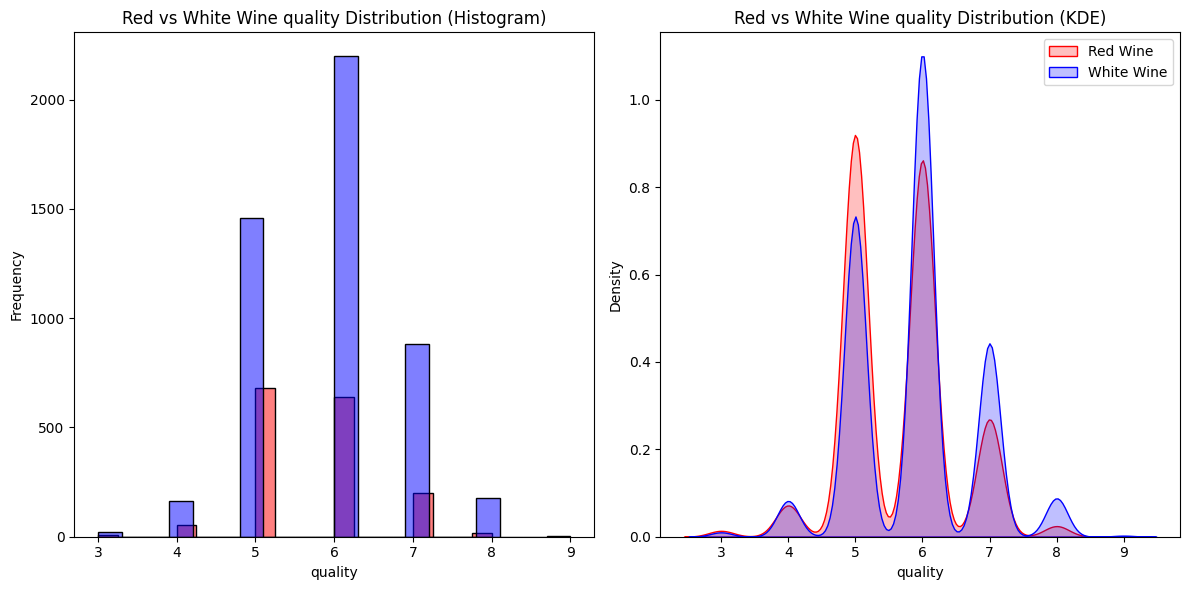

In [ ]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Plot histogram for Red vs White Wine Quality Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=red_wine_data, x='quality', bins=20, color='r', alpha=0.5, label='Red Wine') # Plot histogram for quality of red wine
sns.histplot(data=white_wine_data, x='quality', bins=20, color='b', alpha=0.5, label='White Wine')# Plot histogram for quality of white wine
plt.title('Red vs White Wine quality Distribution (Histogram)')
plt.xlabel('quality')
plt.ylabel('Frequency')

# Plot KDE plot for Red vs White Wine Quality Distribution
plt.subplot(1, 2, 2)
sns.kdeplot(data=red_wine_data['quality'], shade=True, color='r', label='Red Wine')# Plot KDE for quality of red wine
sns.kdeplot(data=white_wine_data['quality'], shade=True, color='b', label='White Wine')# Plot KDE for quality of white wine
plt.title('Red vs White Wine quality Distribution (KDE)')
plt.legend()

plt.tight_layout()
plt.show()


## **Observation:**
 I got to know about a method to plot KDE and Histogram for all the feature with minimal code to write. This is how it's done.

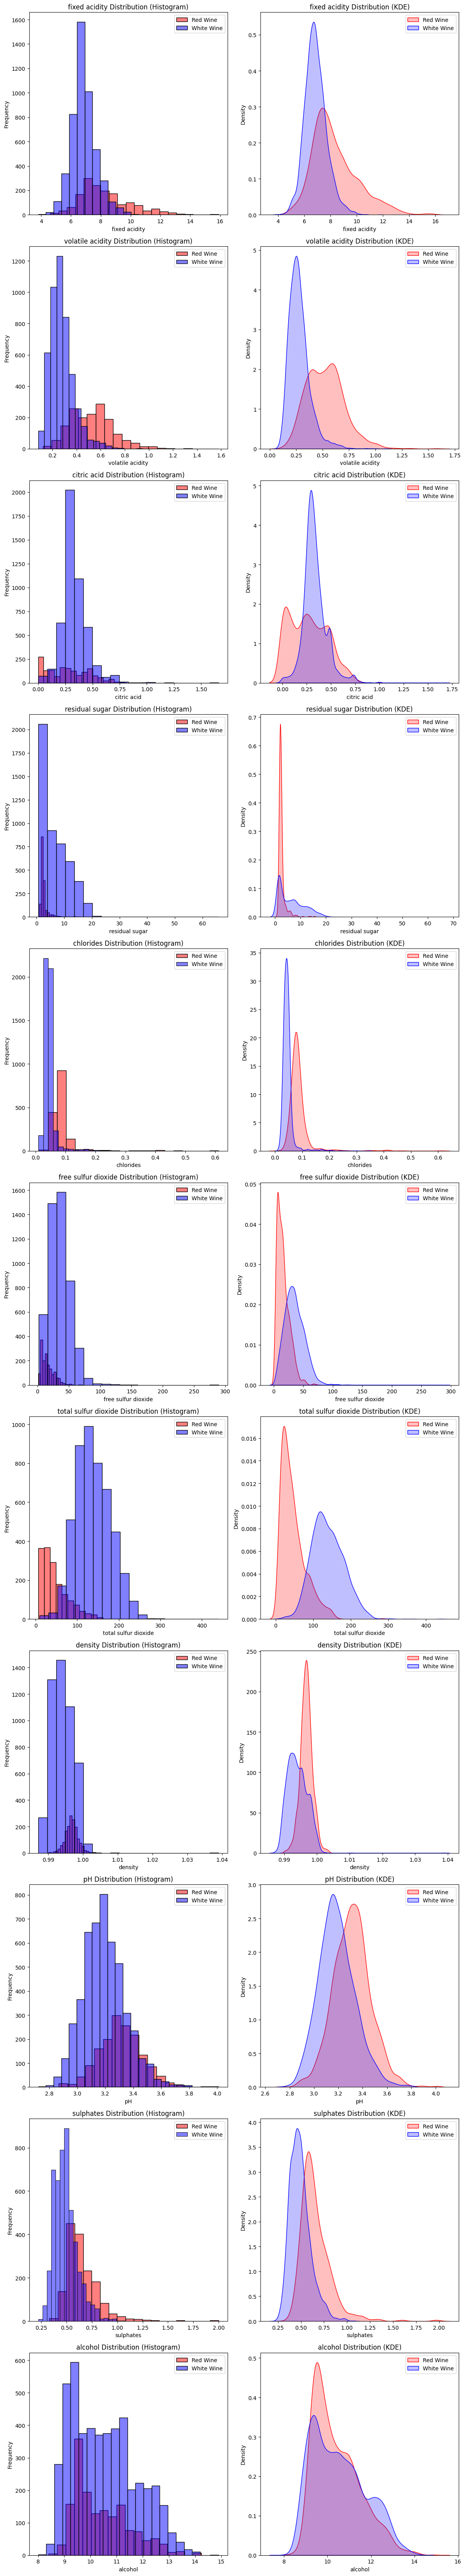

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to visualize
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Set up the figure
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(12, 6 * len(features)))

# Loop through each feature and plot histograms and KDE plots
for i, feature in enumerate(features):
    # Plot histogram for red wine
    sns.histplot(data=red_wine_data, x=feature, bins=20, color='r', alpha=0.5, ax=axes[i, 0], label='Red Wine')
    # Plot histogram for white wine
    sns.histplot(data=white_wine_data, x=feature, bins=20, color='b', alpha=0.5, ax=axes[i, 0], label='White Wine')
    axes[i, 0].set_title(f'{feature} Distribution (Histogram)')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].legend()

    # Plot KDE plot for red wine
    sns.kdeplot(data=red_wine_data[feature], fill=True, color='r', ax=axes[i, 1], label='Red Wine')
    # Plot KDE plot for white wine
    sns.kdeplot(data=white_wine_data[feature], fill=True, color='b', ax=axes[i, 1], label='White Wine')
    axes[i, 1].set_title(f'{feature} Distribution (KDE)')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


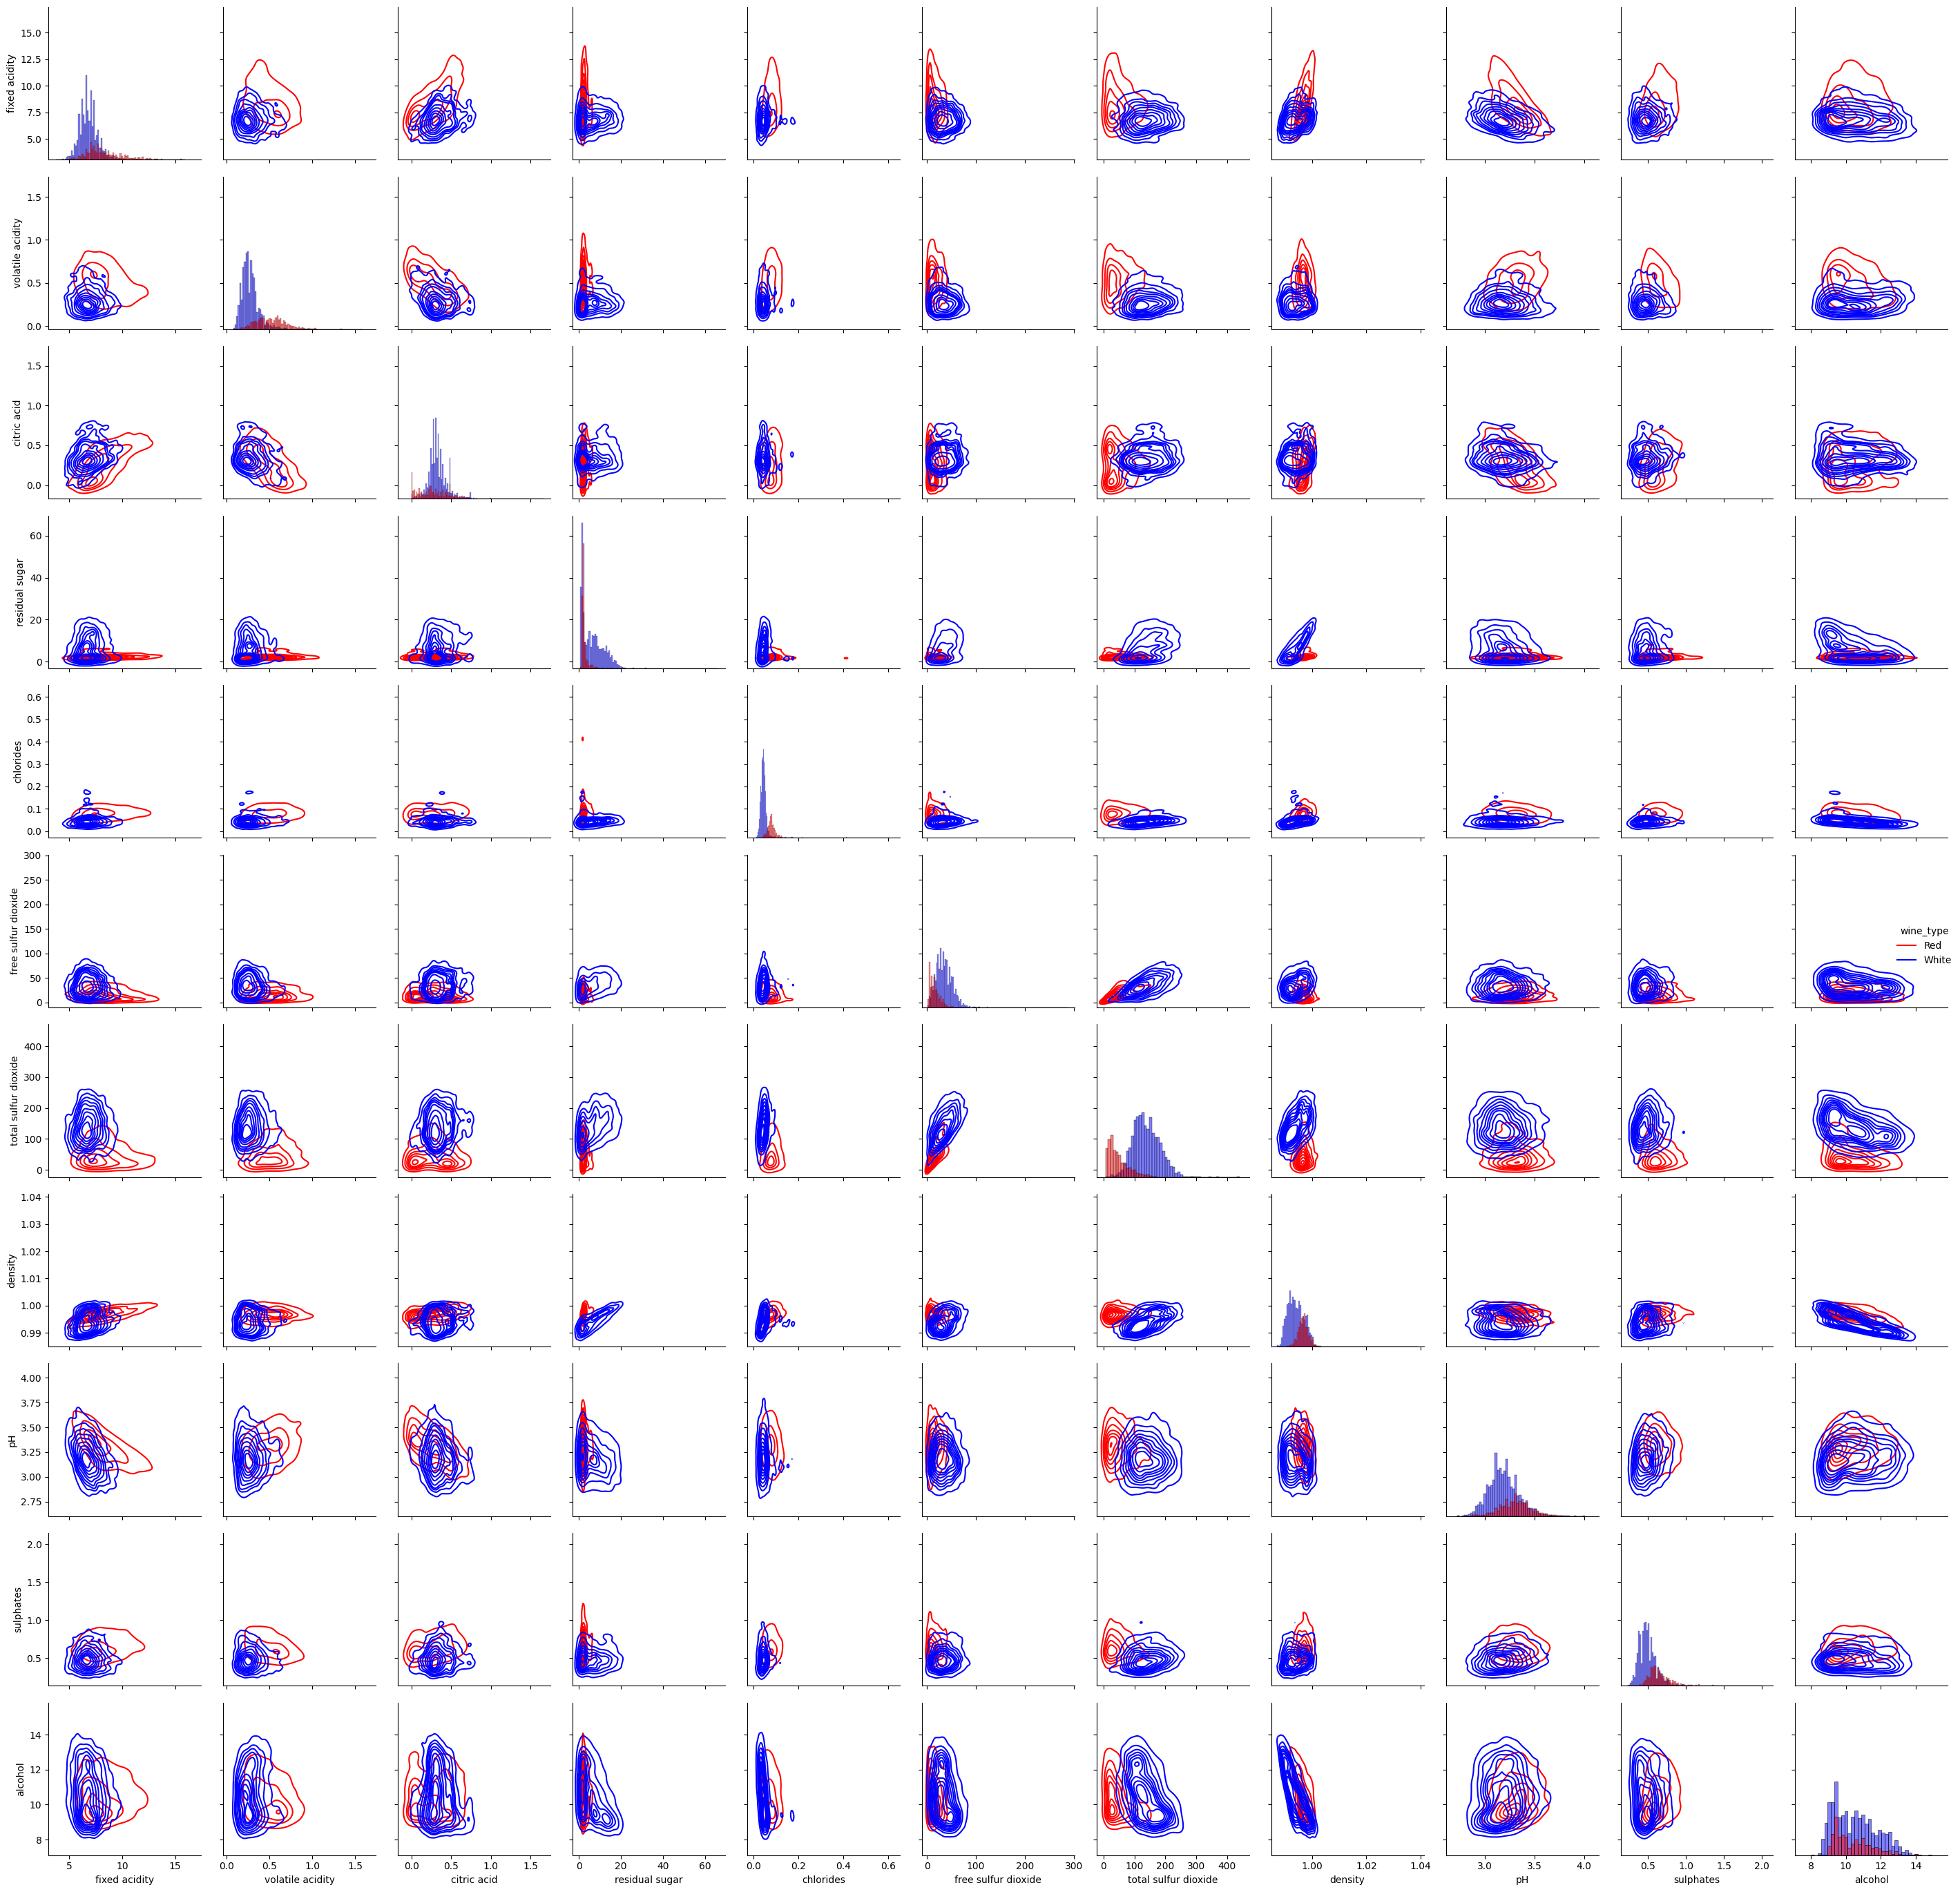

In [ ]:
import seaborn as sns

# Select features to visualize
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Concatenate red and white wine datasets
wine_data = pd.concat([red_wine_data[selected_features], white_wine_data[selected_features]], axis=0)

# Add a column indicating wine type (red or white)
wine_data['wine_type'] = ['Red'] * len(red_wine_data) + ['White'] * len(white_wine_data)

# Plot pairplot with histograms and KDE plots
sns.pairplot(wine_data, hue='wine_type', kind='kde', diag_kind='hist', palette={'Red': 'r', 'White': 'b'})

plt.tight_layout()
plt.show()


## **Preprocessing:**

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load datasets
red_wine_data = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine_data = pd.read_csv("winequality-white.csv", delimiter=";")

# 1. Handling Missing Values
# Not required as no missing values found in our data

# 2. Feature Scaling
scaler = StandardScaler()
red_wine_data_scaled = scaler.fit_transform(red_wine_data)
white_wine_data_scaled = scaler.fit_transform(white_wine_data)

# 3. Encoding Categorical Variables (if any)
# Assuming there are no categorical variables in the datasets

# 4. Handling Outliers (if any)
# No outlier handling in this example

# 5. Feature Engineering (if any)
# No feature engineering in this example

# 6. Dimensionality Reduction (if required)
# No dimensionality reduction in this example

# 7. Normalization
normalized_red_wine_data = (red_wine_data - red_wine_data.min()) / (red_wine_data.max() - red_wine_data.min())
normalized_white_wine_data = (white_wine_data - white_wine_data.min()) / (white_wine_data.max() - white_wine_data.min())



##1(c).
 Train, validate varying at least one hyperparameter, and test at least two types of models:

i. Random forest

ii. Support vector regression with RBF kernel

iii. Neural network with single hidden layer (output layer should have linear activation)

In [64]:
# Define features and target variables for red wine dataset
X_red = red_wine_data.drop(columns=['quality'])  # Features
y_red = red_wine_data['quality']  # Target variable

# Define features and target variables for white wine dataset
X_white = white_wine_data.drop(columns=['quality'])  # Features
y_white = white_wine_data['quality']  # Target variable

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# i. Random Forest
# Define and initialize the Random Forest model for red wine
rf_red_model = RandomForestRegressor(random_state=42)

# Perform grid search using cross-validation to find the best hyperparameters
grid_search_red = GridSearchCV(estimator=rf_red_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_red.fit(X_red_train, y_red_train)

# Get the best Random Forest model for red wine
rf_red_model = grid_search_red.best_estimator_

# Train the best Random Forest model for red wine
rf_red_model.fit(X_red_train, y_red_train)

# Get predictions for validation set
rf_red_val_predictions = rf_red_model.predict(X_red_val)

# Calculate validation MSE for the best Random Forest model for red wine
rf_red_val_mse = mean_squared_error(y_red_val, rf_red_val_predictions)

# Print validation MSE for the best Random Forest model for red wine
print("Validation MSE for Random Forest (Red Wine):", rf_red_val_mse)

# Get predictions for test set
rf_red_test_predictions = rf_red_model.predict(X_red_test)

# Calculate test MSE for the best Random Forest model for red wine
rf_red_test_mse = mean_squared_error(y_red_test, rf_red_test_predictions)

# Print test MSE for the best Random Forest model for red wine
print("Test MSE for Random Forest (Red Wine):", rf_red_test_mse)

# Similarly, perform the same steps for white wine dataset
# Define and initialize the Random Forest model for white wine
rf_white_model = RandomForestRegressor(random_state=42)

# Perform grid search using cross-validation to find the best hyperparameters
grid_search_white = GridSearchCV(estimator=rf_white_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_white.fit(X_white_train, y_white_train)

# Get the best Random Forest model for white wine
rf_white_model = grid_search_white.best_estimator_

# Train the best Random Forest model for white wine
rf_white_model.fit(X_white_train, y_white_train)

# Get predictions for validation set
rf_white_val_predictions = rf_white_model.predict(X_white_val)

# Calculate validation MSE for the best Random Forest model for white wine
rf_white_val_mse = mean_squared_error(y_white_val, rf_white_val_predictions)

# Print validation MSE for the best Random Forest model for white wine
print("Validation MSE for Random Forest (White Wine):", rf_white_val_mse)

# Get predictions for test set
rf_white_test_predictions = rf_white_model.predict(X_white_test)

# Calculate test MSE for the best Random Forest model for white wine
rf_white_test_mse = mean_squared_error(y_white_test, rf_white_test_predictions)

# Print test MSE for the best Random Forest model for white wine
print("Test MSE for Random Forest (White Wine):", rf_white_test_mse)


Validation MSE for Random Forest (Red Wine): 0.3257211458333334
Test MSE for Random Forest (Red Wine): 0.37088229166666664
Validation MSE for Random Forest (White Wine): 0.40756455782312917
Test MSE for Random Forest (White Wine): 0.3067281632653061


In [68]:
import pickle

# Save the trained random forest model for red wine to a file
with open('random_forest_red_model.pkl', 'wb') as file:
    pickle.dump(rf_red_model, file)

# Save the trained random forest model for white wine to a file
with open('random_forest_white_model.pkl', 'wb') as file:
    pickle.dump(rf_white_model, file)


In [88]:
# ii. Support Vector Regression with RBF kernel
# Train and validate SVR for red wine
svr_red_model = SVR(kernel='rbf')
svr_red_model.fit(X_red_train, y_red_train)
svr_red_val_predictions = svr_red_model.predict(X_red_val)
svr_red_val_mse = mean_squared_error(y_red_val, svr_red_val_predictions)

# Train and validate SVR for white wine
svr_white_model = SVR(kernel='rbf')
svr_white_model.fit(X_white_train, y_white_train)
svr_white_val_predictions = svr_white_model.predict(X_white_val)
svr_white_val_mse = mean_squared_error(y_white_val, svr_white_val_predictions)

# Print validation MSE for SVR
print("Validation MSE for SVR (Red Wine):", svr_red_val_mse)
print("Validation MSE for SVR (White Wine):", svr_white_val_mse)

# Test the models on the testing set
svr_red_test_predictions = svr_red_model.predict(X_red_test)
svr_red_test_mse = mean_squared_error(y_red_test, svr_red_test_predictions)

svr_white_test_predictions = svr_white_model.predict(X_white_test)
svr_white_test_mse = mean_squared_error(y_white_test, svr_white_test_predictions)

# Print test MSE for SVR
print("Test MSE for SVR (Red Wine):", svr_red_test_mse)
print("Test MSE for SVR (White Wine):", svr_white_test_mse)

Validation MSE for SVR (Red Wine): 0.4951000980247025
Validation MSE for SVR (White Wine): 0.6821562702548083
Test MSE for SVR (Red Wine): 0.5591770843021194
Test MSE for SVR (White Wine): 0.6000763164284657


In [89]:
# iii. Neural Network with single hidden layer
# Train and validate Neural Network for red wine
nn_red_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
nn_red_model.fit(X_red_train, y_red_train)
nn_red_val_predictions = nn_red_model.predict(X_red_val)
nn_red_val_mse = mean_squared_error(y_red_val, nn_red_val_predictions)

# Train and validate Neural Network for white wine
nn_white_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
nn_white_model.fit(X_white_train, y_white_train)
nn_white_val_predictions = nn_white_model.predict(X_white_val)
nn_white_val_mse = mean_squared_error(y_white_val, nn_white_val_predictions)

# Print validation MSE for each model
print("Validation MSE for Neural Network (Red Wine):", nn_red_val_mse)
print("Validation MSE for Neural Network (White Wine):", nn_white_val_mse)

# Test the models on the testing set
nn_red_test_predictions = nn_red_model.predict(X_red_test)
nn_red_test_mse = mean_squared_error(y_red_test, nn_red_test_predictions)

nn_white_test_predictions = nn_white_model.predict(X_white_test)
nn_white_test_mse = mean_squared_error(y_white_test, nn_white_test_predictions)

# Print test MSE for Neural Network
print("Test MSE for Neural Network (Red Wine):", nn_red_test_mse)
print("Test MSE for Neural Network (White Wine):", nn_white_test_mse)

Validation MSE for Neural Network (Red Wine): 0.4167097159421582
Validation MSE for Neural Network (White Wine): 0.5718088096729097
Test MSE for Neural Network (Red Wine): 0.4656242800107167
Test MSE for Neural Network (White Wine): 0.5764451697920072


##**1(d).**
 Search the net about how to determine the importance of each variable, and find the importance in the final models tried. Comment on whether the same variables are important for different models.

##**Note:**
 We can use various techniques such as feature importance from tree-based models like Random Forest, coefficients from linear models, or permutation importance.

##**Random Forest Feature Importance:**

In [90]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model for red wine
rf_red_model = RandomForestRegressor()
rf_red_model.fit(X_red_train, y_red_train)

# Train the Random Forest model for white wine
rf_white_model = RandomForestRegressor()
rf_white_model.fit(X_white_train, y_white_train)

# Get feature importances for red wine
feature_importances_red = rf_red_model.feature_importances_

# Get feature importances for white wine
feature_importances_white = rf_white_model.feature_importances_


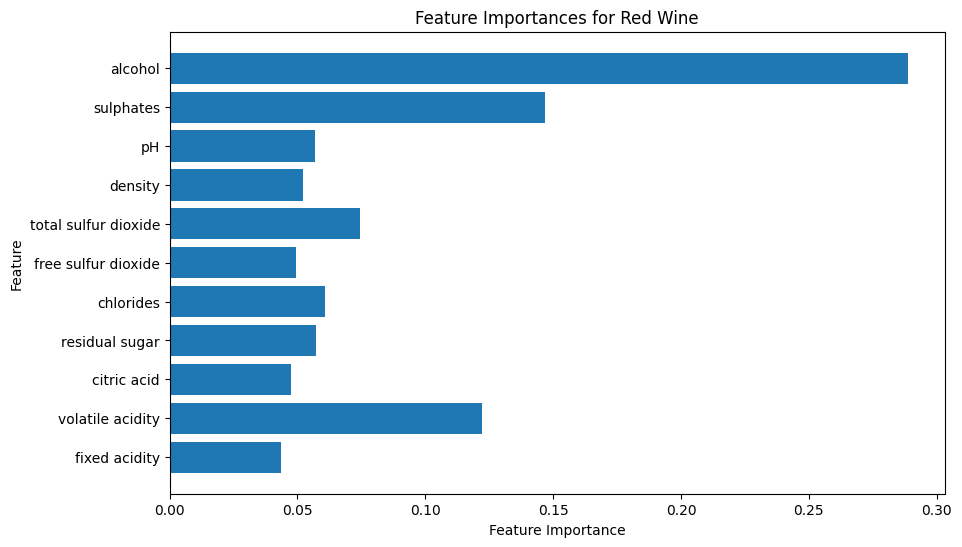

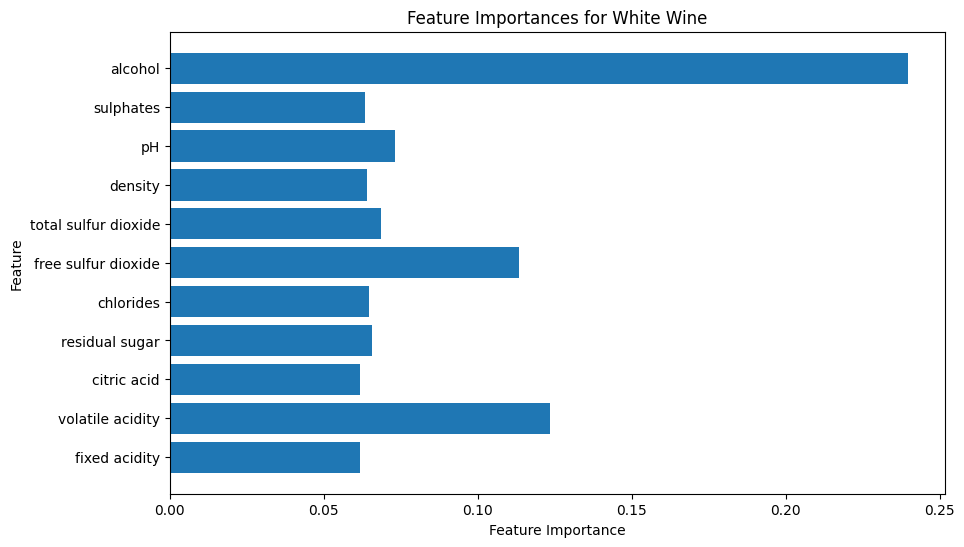

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Define feature names for red wine
feature_names_red = X_red_train.columns.tolist()
# Define feature names for white wine
feature_names_white = X_white_train.columns.tolist()

# Plot feature importances for red wine
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances_red)), feature_importances_red, align='center')
plt.yticks(range(len(feature_importances_red)), feature_names_red)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Red Wine')
plt.show()

# Plot feature importances for white wine
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances_white)), feature_importances_white, align='center')
plt.yticks(range(len(feature_importances_white)), feature_names_white)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for White Wine')
plt.show()

## **Permutation Importance:**

In [92]:
from sklearn.inspection import permutation_importance

# Compute permutation importance for the Random Forest model for red wine
rf_permutation_importance_red = permutation_importance(rf_red_model, X_red_test, y_red_test)

# Compute permutation importance for the Random Forest model for white wine
rf_permutation_importance_white = permutation_importance(rf_white_model, X_white_test, y_white_test)

# Get feature importances from permutation importance results for red wine
feature_importances_perm_red = rf_permutation_importance_red.importances_mean

# Get feature importances from permutation importance results for white wine
feature_importances_perm_white = rf_permutation_importance_white.importances_mean


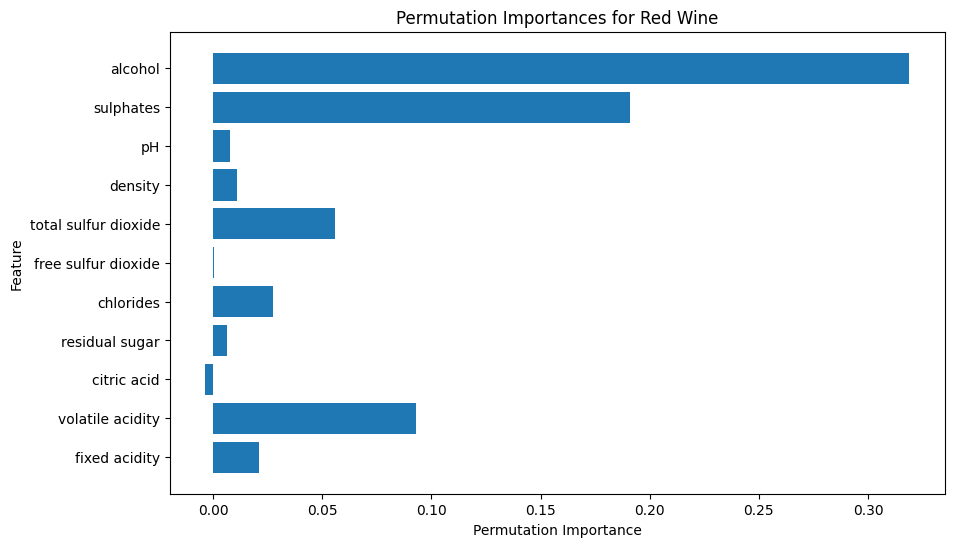

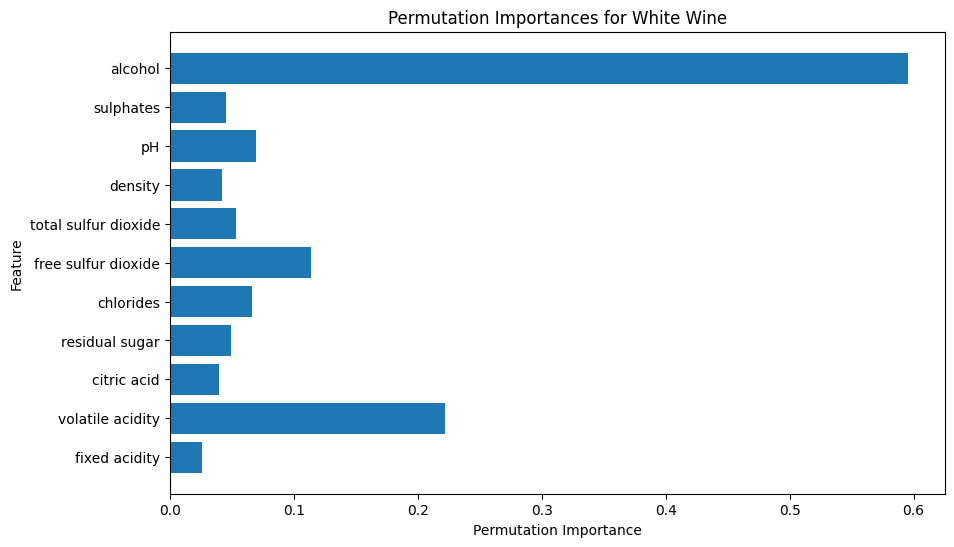

In [93]:
import matplotlib.pyplot as plt

# Plot permutation importances for red wine
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances_perm_red)), feature_importances_perm_red, align='center')
plt.yticks(range(len(feature_importances_perm_red)), feature_names_red)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importances for Red Wine')
plt.show()

# Plot permutation importances for white wine
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances_perm_white)), feature_importances_perm_white, align='center')
plt.yticks(range(len(feature_importances_perm_white)), feature_names_white)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importances for White Wine')
plt.show()

## **1(e).**
 Test the model for red with data from white and vice versa, and comment on whether the model forred wines is applicable to white wines and versa or not

## **Test Red Wine Model on White Wine Data:**

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the trained white wine model on red wine data
red_model_white_data_predictions = rf_red_model.predict(X_white_test)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_white_test, red_model_white_data_predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_white_test, red_model_white_data_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_white_test, red_model_white_data_predictions, squared=False)

# Calculate R-squared (R2)
r2 = r2_score(y_white_test, red_model_white_data_predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.6258639455782313
Mean Squared Error (MSE): 0.6457206802721089
Root Mean Squared Error (RMSE): 0.8035674708897249
R-squared (R2): 0.0851347653791279


## **Test White Wine Model on Red Wine Data:**

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the trained white wine model on red wine data
white_model_red_data_predictions = rf_white_model.predict(X_red_test)

# Calculate Mean Absolute Error (MAE)
mae_white_red = mean_absolute_error(y_red_test, white_model_red_data_predictions)

# Calculate Mean Squared Error (MSE)
mse_white_red = mean_squared_error(y_red_test, white_model_red_data_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_white_red = mean_squared_error(y_red_test, white_model_red_data_predictions, squared=False)

# Calculate R-squared (R2)
r2_white_red = r2_score(y_red_test, white_model_red_data_predictions)

# Print evaluation metrics
print("Mean Absolute Error (MAE) for white wine model on red wine data:", mae_white_red)
print("Mean Squared Error (MSE) for white wine model on red wine data:", mse_white_red)
print("Root Mean Squared Error (RMSE) for white wine model on red wine data:", rmse_white_red)
print("R-squared (R2) for white wine model on red wine data:", r2_white_red)


Mean Absolute Error (MAE) for white wine model on red wine data: 0.9193333333333332
Mean Squared Error (MSE) for white wine model on red wine data: 1.3139525
Root Mean Squared Error (RMSE) for white wine model on red wine data: 1.1462776714217198
R-squared (R2) for white wine model on red wine data: -0.9546400826446286


## **Observations:**
 From the results we can derive that

1. The red wine model performs better on white wine data than the white wine model performs on red wine data, as indicated by lower MAE, MSE, and RMSE values, as well as a higher R-squared value.

2. The R-squared value for the white wine model on red wine data is negative, indicating that the model's predictions are worse than simply using the mean of the target variable. This suggests that the white wine model does not generalize well to the red wine dataset.


## Source : ChatGPT

## **Question 2**. Classification:

a. Download the data to predict Down syndrome in mice fromhttps://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression#. The prediction problem is toeither predict the genotype (binary) using the gene expression variables from DYRK1A_N to CaNA_N.

b. Explore, visualize, and pre-process the data as appropriate, including developing a strategy to dealwith missing variables. You can choose to impute the variable. The recommended way is to usemultivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html)

In [ ]:
import requests

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls"

# File path to save the downloaded dataset
file_path = "Data_Cortex_Nuclear.xls"

# Download the dataset
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Write the content to a file
    with open(file_path, "wb") as file:
        file.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print("Failed to download dataset.")


Dataset downloaded successfully.


## **Explore:**

In [ ]:
from IPython.display import display

# Load the dataset into a Pandas DataFrame
file_path = "Data_Cortex_Nuclear.xls"
data = pd.read_excel(file_path)

# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nColumns:", data.columns)

# Display the first few rows of the dataset in a better format
print("\nFirst few rows of the dataset:")
display(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)



Dataset shape: (1080, 82)

Columns: Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]


Missing values:
MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64


## **Visualisation:**

<Figure size 1600x1000 with 0 Axes>

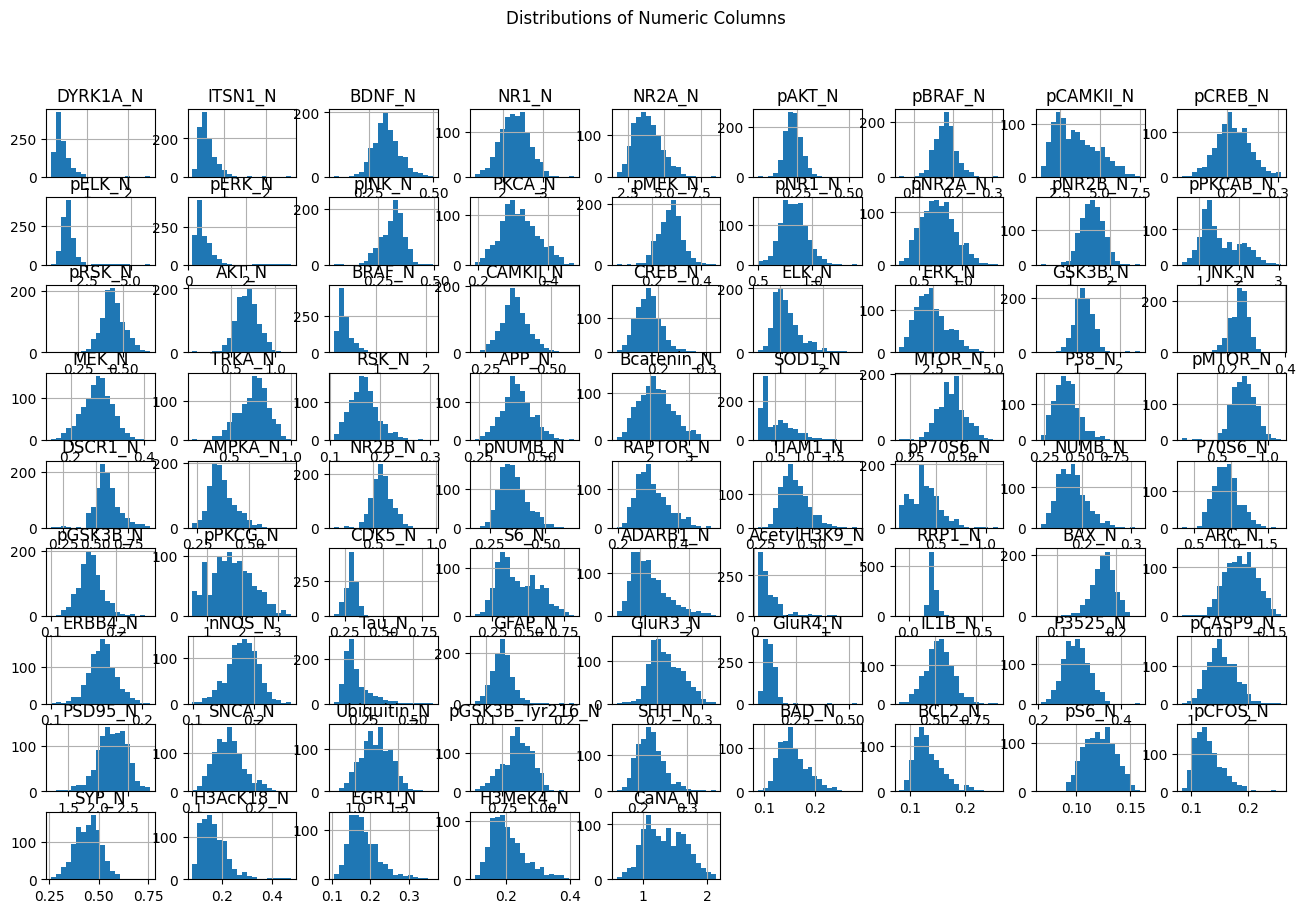

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a Pandas DataFrame
file_path = "Data_Cortex_Nuclear.xls"
data = pd.read_excel(file_path)

# Visualize distributions of numeric columns
plt.figure(figsize=(16, 10))
data.drop(columns=['MouseID', 'Treatment', 'Behavior', 'class', 'Genotype']).hist(bins=20, figsize=(16, 10))
plt.suptitle('Distributions of Numeric Columns')
plt.show()


<ipython-input-29-ef662827598d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(columns=['MouseID', 'Treatment', 'Behavior', 'class']).corr(), cmap='coolwarm', annot=True)


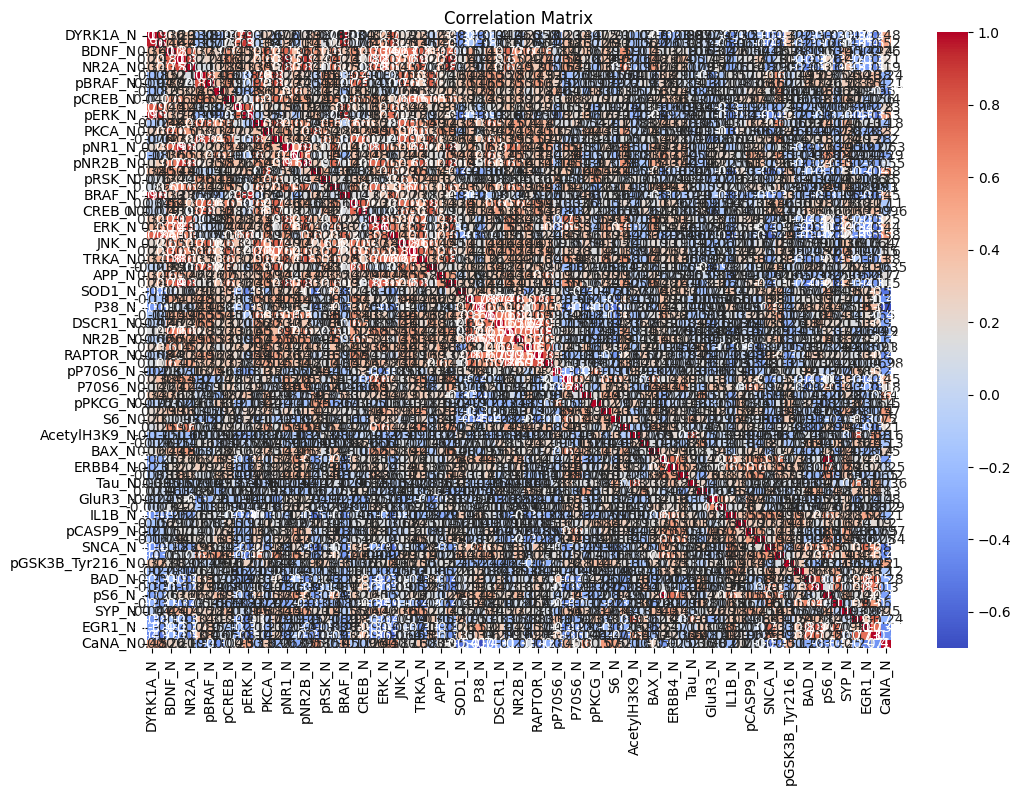

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns=['MouseID', 'Treatment', 'Behavior', 'class']).corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

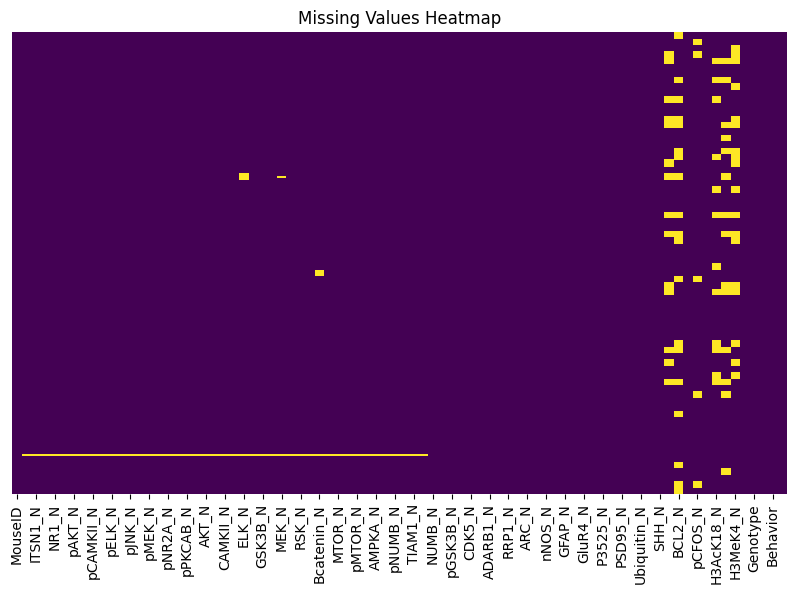

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

##**Pre-Processing:**

1. Fixing missing variables problem

In [ ]:
from sklearn.impute import SimpleImputer
from IPython.display import display

# Load the dataset into a Pandas DataFrame
file_path = "Data_Cortex_Nuclear.xls"
data = pd.read_excel(file_path)

# Drop non-gene expression columns and the 'class' column
gene_data = data.drop(columns=['MouseID', 'Treatment', 'Behavior', 'class', 'Genotype'])

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
imputed_data = pd.DataFrame(imputer.fit_transform(gene_data), columns=gene_data.columns)

# Display the first few rows of the dataset after imputation
print("\nFirst few rows of the dataset after imputation:")
display(imputed_data.head())

# Check if there are any missing values after imputation
print("\nMissing values after imputation:")
display(imputed_data.isnull().sum())




First few rows of the dataset after imputation:


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N     pS6_N  \
0   2.373744  0.232224  1.750936  ...  0.188852  0.122652  0.134762  0.106305   
1   2.292150  0.226972  1.596377  ...  0.200404  0.116682  0.134762  0.106592   
2   2.283337  0.230247  1.561316  ...  0.193685  0.118508  0.134762  0.108303   
3   2.152301  0.207004  1.595086  ...  0.192112  0.132781  0.134762  0.103184   
4   2.134014  0.192158  1.504230  ...  0.205604  0.129954  0.134762  0.104784   

    pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
0  0.108336  0.427099   0.114783  0.131790  0.128186  1.675652  
1  0.104315  0.441581   0.111974  0.135103  0.131119  1.743610  
2  0.106219  0.435777   0.111883  0.133362  0.127431  1.926427  
3  0.111262  0.391691   0.130405  0.147444  0.146901  1.700563  
4  0.110694  0.434154   0.118481  0.140314  0.148380  1.839730  

[5 rows x 77 columns]


Missing values after imputation:


DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 77, dtype: int64

In [ ]:
# Print data types of all columns
print("Data types of all columns:")
print(gene_data.dtypes)


Data types of all columns:
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
SYP_N        float64
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Length: 77, dtype: object


##**2(C).**Train, validate varying at least one hyperparameter, and test at least two types of models:

i. Random forest

ii. Support vector classification using RBF kernel

iii. Neural network with single hidden layer (output layer should be have softmax activation)

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset into a Pandas DataFrame
file_path = "Data_Cortex_Nuclear.xls"
data = pd.read_excel(file_path)

# Drop non-gene expression columns and the 'class' column
gene_data = data.drop(columns=['MouseID', 'Treatment', 'Behavior', 'class'])

# Split the data into features (X) and target (y)
X = gene_data.drop(columns=['Genotype'])  # Features
y = gene_data['Genotype']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, we can proceed with training and evaluating the models as mentioned in the instructions.


## **Random Forest model**

In [71]:
# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_imputed, y_train)

# Get the best Random Forest model
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best Random Forest model
rf_predictions = best_rf_model.predict(X_test_imputed)

# Evaluate Random Forest accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Best Hyperparameters:", grid_search.best_params_)

Random Forest Accuracy: 0.9814814814814815
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


## **Support Vector Classification using RBF kernel:**

In [ ]:
from sklearn.svm import SVC

# Instantiate the Support Vector Classification model with RBF kernel
svc_model = SVC(kernel='rbf', random_state=42)

# Fit the model on the imputed training data
svc_model.fit(X_train_imputed, y_train)

# Predict on the test set
svc_predictions = svc_model.predict(X_test_imputed)

# Evaluate accuracy
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("SVC with RBF Kernel Accuracy:", svc_accuracy)


SVC with RBF Kernel Accuracy: 0.8611111111111112


## **Neural Network with a single hidden layer:**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Instantiate the Neural Network model with increased max_iter
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Fit the model on the imputed training data
nn_model.fit(X_train_imputed, y_train)

# Predict on the test set
nn_predictions = nn_model.predict(X_test_imputed)

# Evaluate accuracy
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Neural Network Accuracy:", nn_accuracy)


Neural Network Accuracy: 0.9907407407407407


## **2(d).**
 See if removing some features systematically will improve your models using recursive featureelimination https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Train a linear kernel SVC for feature selection
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_train_imputed, y_train)

# Create SelectFromModel object with linear SVC as the estimator
sfm = SelectFromModel(estimator=svc_linear, prefit=True)

# Transform the training and testing data
X_train_selected = sfm.transform(X_train_imputed)
X_test_selected = sfm.transform(X_test_imputed)

# Print the number of features selected
print("Number of features selected by SelectFromModel:", X_train_selected.shape[1])


Number of features selected by SelectFromModel: 25


In [ ]:
# Train the SVC model with selected features
svc_model_selected = SVC(kernel='rbf', random_state=42)
svc_model_selected.fit(X_train_selected, y_train)

# Transform the test set with selected features
X_test_selected = sfm.transform(X_test_imputed)

# Predict on the test set with selected features
svc_predictions_selected = svc_model_selected.predict(X_test_selected)

# Evaluate accuracy
svc_accuracy_selected = accuracy_score(y_test, svc_predictions_selected)
print("SVC with RBF Kernel Accuracy (with selected features):", svc_accuracy_selected)


SVC with RBF Kernel Accuracy (with selected features): 0.9305555555555556


## **Observation:**
The accuracy score of approximately 0.931 indicates that the Support Vector Classifier (SVC) with the RBF kernel, trained using the selected features obtained through SelectFromModel, performs well on the test set. This suggests that the feature selection process effectively retained relevant information while reducing the dimensionality of the data, resulting in a model that generalizes well to unseen data.

##**Source:** ChatGPT

## **Question 3**. Practice using pre-trained neural networks to extract domain-specific features for new tasks.

a. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore
“finetuning the ConvNet”. Test this code out to see if it runs properly in your environment aftereliminating code blocks that you do not need.

In [72]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

## **Load Data**

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import os
import requests
import zipfile

# Define the URL for dataset download
url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

# Define the directory to save the downloaded dataset
data_dir = "./hymenoptera_data"

# Create the directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)

# Download the dataset if it's not already downloaded
if not os.path.exists(os.path.join(data_dir, "hymenoptera_data.zip")):
    print("Downloading dataset...")
    response = requests.get(url)
    with open(os.path.join(data_dir, "hymenoptera_data.zip"), "wb") as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")

# Extract the dataset if it's not already extracted
if not os.path.exists(os.path.join(data_dir, "hymenoptera_data")):
    print("Extracting dataset...")
    with zipfile.ZipFile(os.path.join(data_dir, "hymenoptera_data.zip"), "r") as zip_ref:
        zip_ref.extractall(data_dir)
    print("Dataset extracted successfully.")


Dataset downloaded successfully.
Extracting dataset...
Dataset extracted successfully.


In [76]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/hymenoptera_data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## **Visualize a few images**

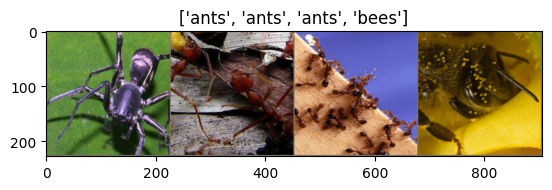

In [77]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [78]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

## **Visualizing the model predictions**

In [79]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## **ConvNet as fixed feature extractor**

In [80]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 86.1MB/s]


## **Train and evaluate**

In [81]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.8322 Acc: 0.5779
val Loss: 0.2740 Acc: 0.8954

Epoch 1/24
----------
train Loss: 0.5230 Acc: 0.7582
val Loss: 0.2619 Acc: 0.9216

Epoch 2/24
----------
train Loss: 0.4077 Acc: 0.8279
val Loss: 0.1855 Acc: 0.9477

Epoch 3/24
----------
train Loss: 0.3962 Acc: 0.7910
val Loss: 0.6443 Acc: 0.7582

Epoch 4/24
----------
train Loss: 0.7206 Acc: 0.7049
val Loss: 0.3939 Acc: 0.8693

Epoch 5/24
----------
train Loss: 0.4191 Acc: 0.8320
val Loss: 0.2610 Acc: 0.9150

Epoch 6/24
----------
train Loss: 0.5314 Acc: 0.7910
val Loss: 0.1753 Acc: 0.9542

Epoch 7/24
----------
train Loss: 0.3547 Acc: 0.8320
val Loss: 0.1881 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.4153 Acc: 0.8361
val Loss: 0.1784 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3505 Acc: 0.8484
val Loss: 0.1788 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.3067 Acc: 0.8852
val Loss: 0.1836 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.3952 Acc: 0.7992
val Loss: 0.1873 Acc: 0.9542

Ep

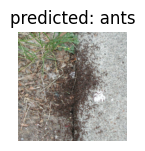

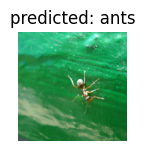

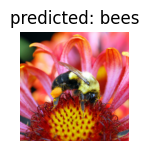

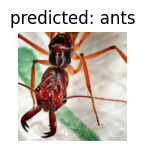

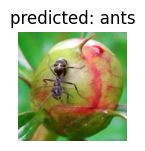

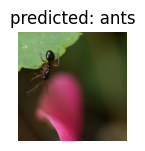

In [82]:
visualize_model(model_conv)

plt.ioff()
plt.show()

## **Inference on custom images**

In [83]:
def visualize_model_predictions(model, img_path):
    was_training = model.training
    model.eval()

    # Define the transformations for validation images
    val_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    img = Image.open(img_path)
    img = val_transforms(img)  # Apply transformations directly to the image
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2, 2, 1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

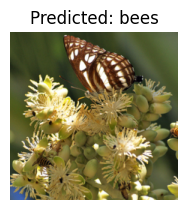

In [84]:
visualize_model_predictions(
    model_conv,
    img_path='/content/hymenoptera_data/hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
)

plt.ioff()
plt.show()

## **3(b)**
 Write a function that outputs ResNet18 features for a given input image. Extract features for training images (in image_datasets['train']). You should get an Nx512 dimensional array.

In [85]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image

# Load pre-trained ResNet18 model
resnet18 = models.resnet18(pretrained=True)
# Remove the classification layer (FC layer) at the end
resnet18 = torch.nn.Sequential(*(list(resnet18.children())[:-1]))
# Set the model to evaluation mode
resnet18.eval()

# Define a function to extract features from an input image
def extract_resnet_features(image_path):
    # Define transformations to be applied to the input image
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    # Load the image and apply transformations
    image = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(image)
    # Add batch dimension to the input tensor
    input_batch = input_tensor.unsqueeze(0)
    # Extract features using the pre-trained ResNet18 model
    with torch.no_grad():
        features = resnet18(input_batch)
    # Squeeze the output tensor to remove the batch dimension
    features = torch.squeeze(features)
    return features

# Example usage: Extract ResNet18 features for a given input image
image_path = '/content/hymenoptera_data/hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
features = extract_resnet_features(image_path)
print(features.shape)  # Print the shape of the extracted features


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([512])


In [86]:
import os
import torch
import torchvision.models as models
from torchvision import transforms, datasets
from PIL import Image

# Load pre-trained ResNet18 model
resnet18 = models.resnet18(pretrained=True)
# Remove the classification layer (FC layer) at the end
resnet18 = torch.nn.Sequential(*(list(resnet18.children())[:-1]))
# Set the model to evaluation mode
resnet18.eval()

# Define a function to extract features from an input image
def extract_resnet_features(image_path):
    # Define transformations to be applied to the input image
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    # Load the image and apply transformations
    image = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(image)
    # Add batch dimension to the input tensor
    input_batch = input_tensor.unsqueeze(0)
    # Extract features using the pre-trained ResNet18 model
    with torch.no_grad():
        features = resnet18(input_batch)
    # Squeeze the output tensor to remove the batch dimension
    features = torch.squeeze(features)
    return features

# Define the directory containing the extracted dataset
data_dir = "/content/hymenoptera_data/hymenoptera_data"

# Load the dataset
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          transforms.Compose([
                                              transforms.Resize(256),
                                              transforms.CenterCrop(224),
                                              transforms.ToTensor(),
                                              transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                   std=[0.229, 0.224, 0.225])
                                          ]))
                  for x in ['train', 'val']}

# Get the paths of training images
train_image_paths = [image_datasets['train'].imgs[i][0] for i in range(len(image_datasets['train']))]

# Extract features for training images
train_features = []
for image_path in train_image_paths:
    features = extract_resnet_features(image_path)
    train_features.append(features)

# Convert the list of features to a tensor
train_features_tensor = torch.stack(train_features)

# Print the shape of the extracted features
print("Shape of the extracted features:", train_features_tensor.shape)


Shape of the extracted features: torch.Size([244, 512])


## **3(c).**
 Compare RBF kernel SVM (do grid search on kernel width and regularization) and random forest (do grid search on max depth and number of trees). Test the final model on test data and show the results -- accuracy and F1 score.

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features_tensor.numpy(), image_datasets['train'].targets, test_size=0.2, random_state=42)

# Define parameter grids for grid search
svm_param_grid = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1]}
rf_param_grid = {'max_depth': [None, 10, 20, 30],
                 'n_estimators': [100, 200, 300]}

# Perform grid search for SVM
svm_grid_search = GridSearchCV(SVC(kernel='rbf'), svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Perform grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Get best hyperparameters for SVM and Random Forest
best_svm_params = svm_grid_search.best_params_
best_rf_params = rf_grid_search.best_params_

# Train SVM and Random Forest with best hyperparameters
svm_classifier = SVC(kernel='rbf', **best_svm_params)
rf_classifier = RandomForestClassifier(**best_rf_params)

svm_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

# Predictions
svm_preds = svm_classifier.predict(X_test)
rf_preds = rf_classifier.predict(X_test)

# Evaluate models
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_f1_score = f1_score(y_test, svm_preds, average='weighted')
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_f1_score = f1_score(y_test, rf_preds, average='weighted')

print("SVM Accuracy:", svm_accuracy)
print("SVM F1 Score:", svm_f1_score)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1_score)


SVM Accuracy: 0.9591836734693877
SVM F1 Score: 0.9589407191448008
Random Forest Accuracy: 0.9183673469387755
Random Forest F1 Score: 0.9185721111186949


**Observations:** This indicates that the SVM model with the chosen hyperparameters from the grid search generalizes better on the test data compared to the Random Forest model. Overall, SVM seems to be a better choice for this classification task based on the evaluation metrics.



#**Source** : ChatGPT

# **Question 4.**
 Deploy one model from part 1 on a local webserver with a web frontend (e.g. using streamlit). Add some GUI elements, such as sliders for acidity, citrus etc. [2] Most of this should be in the video demo.

In [ ]:
import pickle

# Save the trained random forest model for red wine to a file
with open('random_forest_red_model.pkl', 'wb') as file:
    pickle.dump(rf_red_model, file)

# Save the trained random forest model for white wine to a file
with open('random_forest_white_model.pkl', 'wb') as file:
    pickle.dump(rf_white_model, file)



## Reference:
https://www.youtube.com/watch?v=WLwjvWq0GWA

https://youtu.be/ZZsyxIWdCko?si=j_cyB_g_wSbObtHe


###Source: ChatGPT